----------------------------------
**Nguyễn Thành Long - 103210051 - 21HTCN**

-----------------------------

# Exploratory Data Analysis (EDA)

In [ ]:
!pip install -r requirements.txt

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
data = pd.read_csv("train1.csv")
data.head()

,timestamp,cc1,cc2,sen1,sen2,sen3,sys_tem,cool_tem,sur_tem
0,2023-01-01 00:00:00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,2023-01-01 00:00:01,0.0,0.0,0.000789,0.0,0.0,0.0,0.000021,0.001229
2,2023-01-01 00:00:02,0.0,0.0,0.003115,0.0,0.0,0.0,0.000104,0.004833
3,2023-01-01 00:00:03,0.0,0.0,0.006914,0.0,0.0,0.0,0.000285,0.010688
4,2023-01-01 00:00:04,0.0,0.0,0.012123,0.0,0.0,0.0,0.000601,0.018669


In [6]:
# Convert 'timestamp' to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data.head()

,cc1,cc2,sen1,sen2,sen3,sys_tem,cool_tem,sur_tem
timestamp,,,,,,,,
2023-01-01 00:00:00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2023-01-01 00:00:01,0.0,0.0,0.000789,0.0,0.0,0.0,0.000021,0.001229
2023-01-01 00:00:02,0.0,0.0,0.003115,0.0,0.0,0.0,0.000104,0.004833
2023-01-01 00:00:03,0.0,0.0,0.006914,0.0,0.0,0.0,0.000285,0.010688
2023-01-01 00:00:04,0.0,0.0,0.012123,0.0,0.0,0.0,0.000601,0.018669


## **Data Overview**

In [8]:
data.isna().sum()

cc1         0
cc2         0
sen1        0
sen2        0
sen3        0
sys_tem     0
cool_tem    0
sur_tem     0
dtype: int64

------------**There is no NaN value**

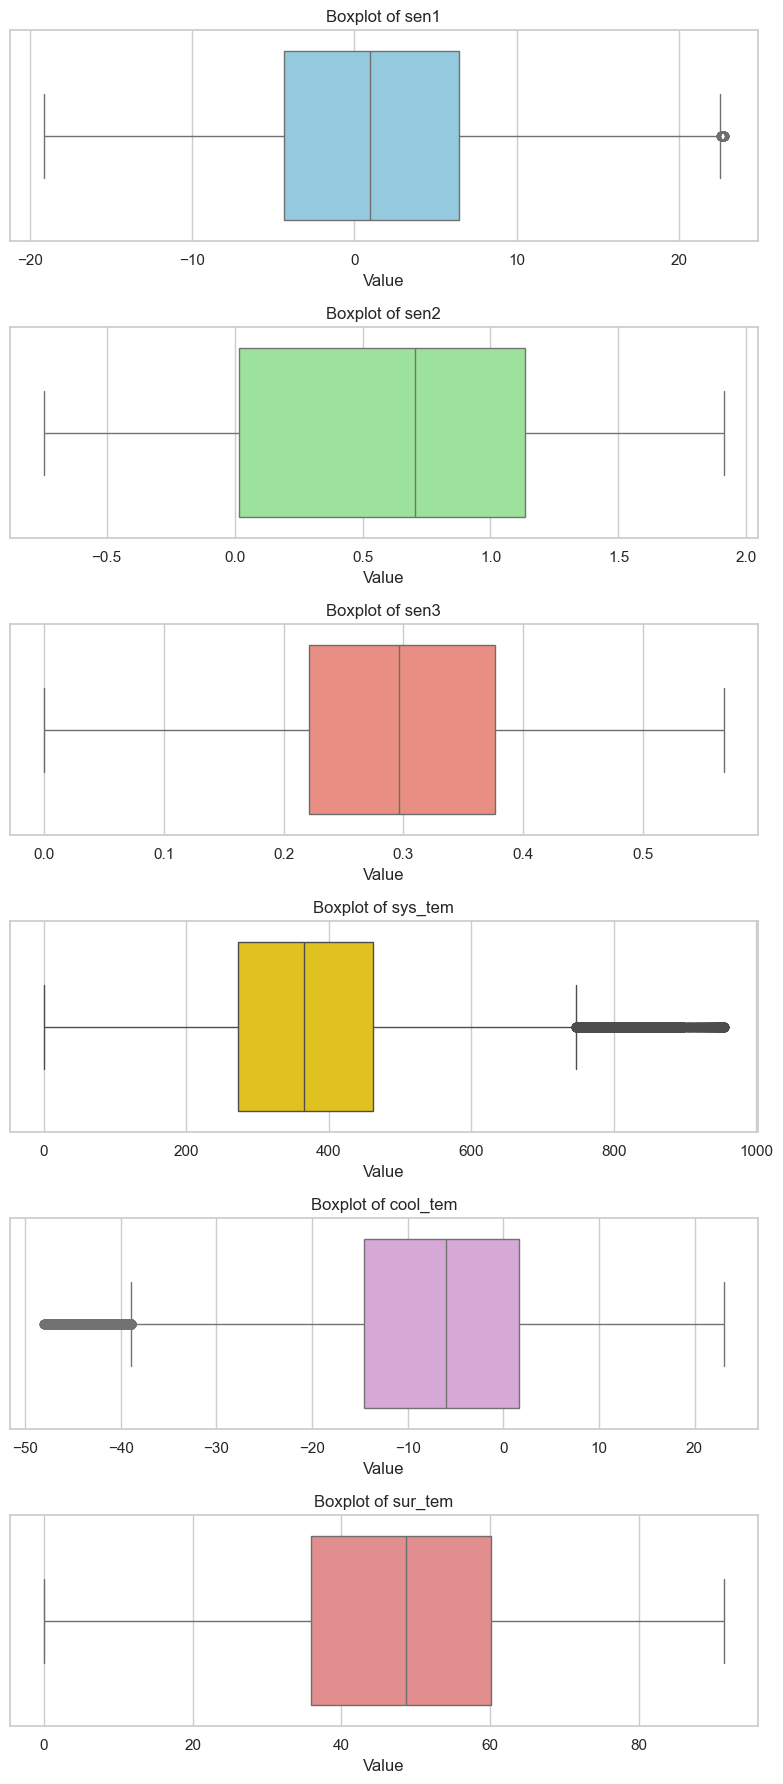

In [36]:
cols = ['sen1', 'sen2', 'sen3', 'sys_tem', 'cool_tem', 'sur_tem']

n = len(sensor_cols)

# Tạo figure với nhiều hàng
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 3*n))
sns.set(style="whitegrid")

colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'plum', 'lightcoral']
# Boxplot
for i, col in enumerate(cols):
    sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


-> Based on the 6 boxplots drawn, we can see that boxplots `sys_tem` and `cool_tem` have many outliers.

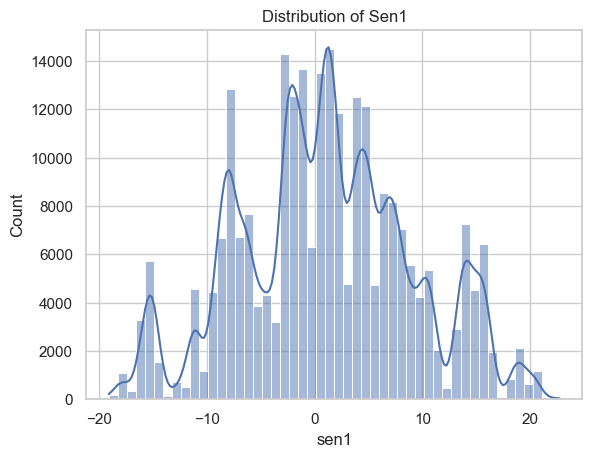

In [54]:
sns.histplot(data["sen1"], bins=50, kde=True)
plt.title("Distribution of Sen1")
plt.show()

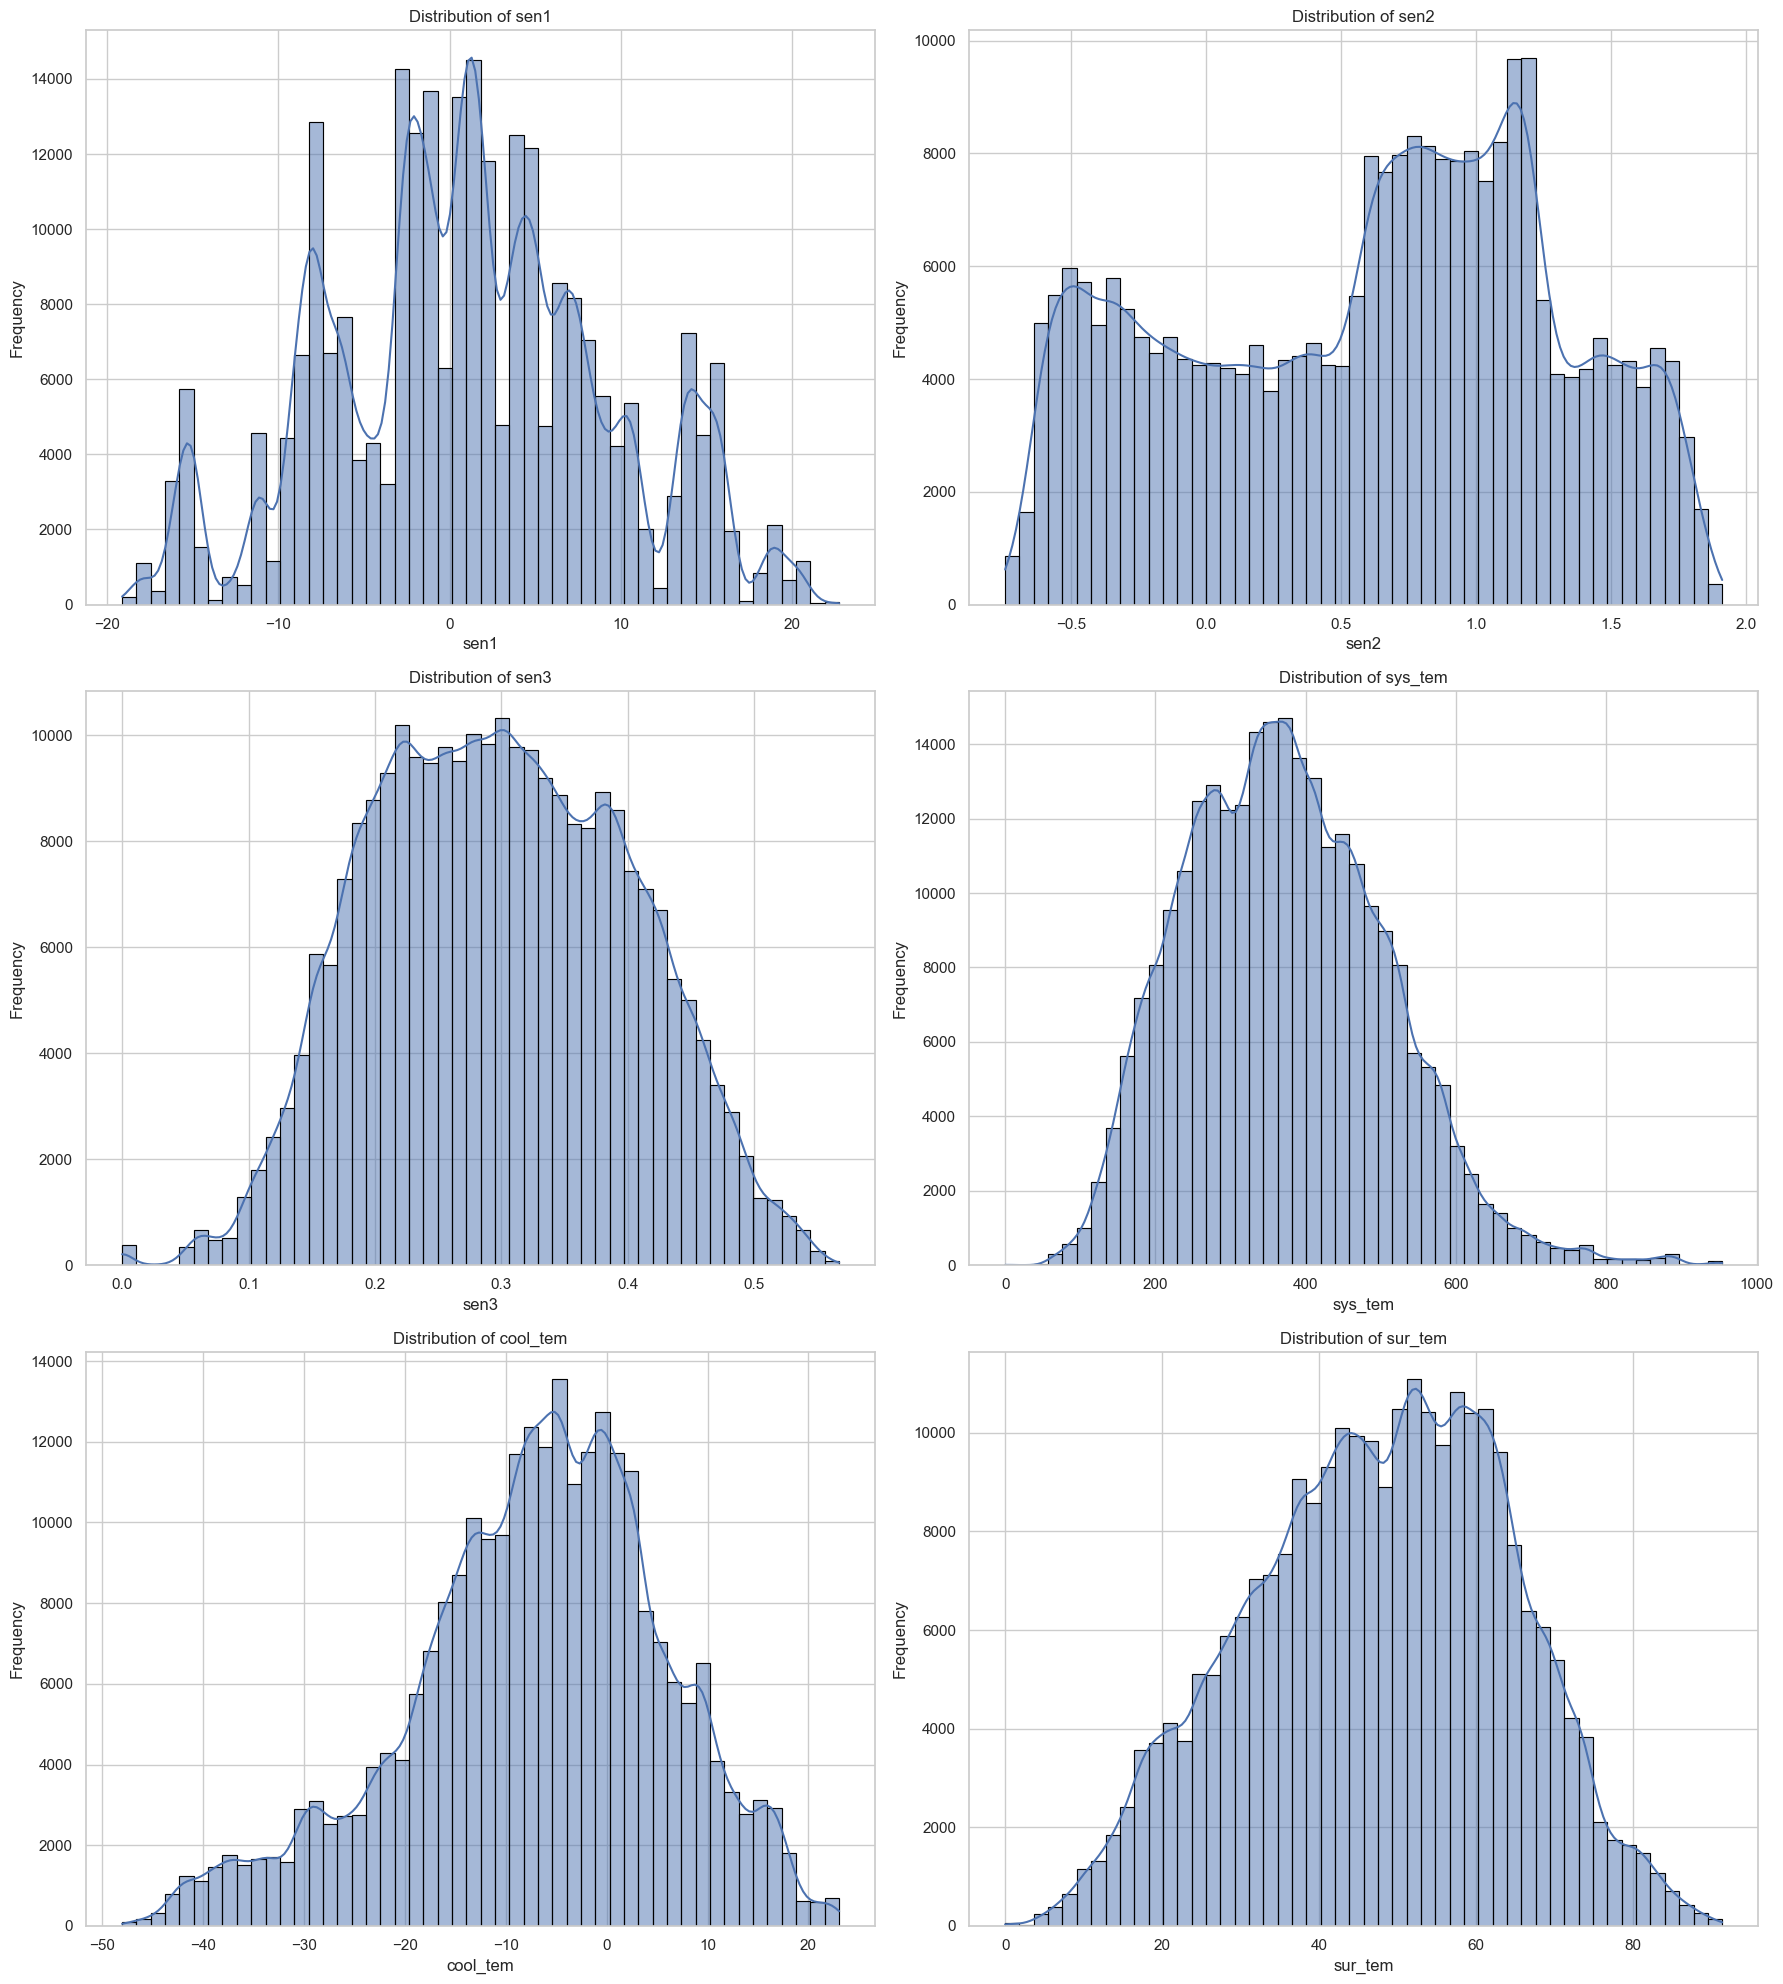

In [69]:
cols = ['sen1', 'sen2', 'sen3', 'sys_tem', 'cool_tem', 'sur_tem']

#  2 rows, 3 cols
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
axes = axes.flatten() 

for i, col in enumerate(cols):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=50, edgecolor="black")
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Time Series Decomposition**

**Trend** : Check long-term trend (increasing/decreasing?)

**Seasonality**: Detect short-term repeating cycles

**Cyclic**: Detect irregular long-term cycles (cyclic patterns)

**Residual**: Analyze residuals – is there any noise left?

### **Trend** : Check long-term trend (increasing/decreasing?)

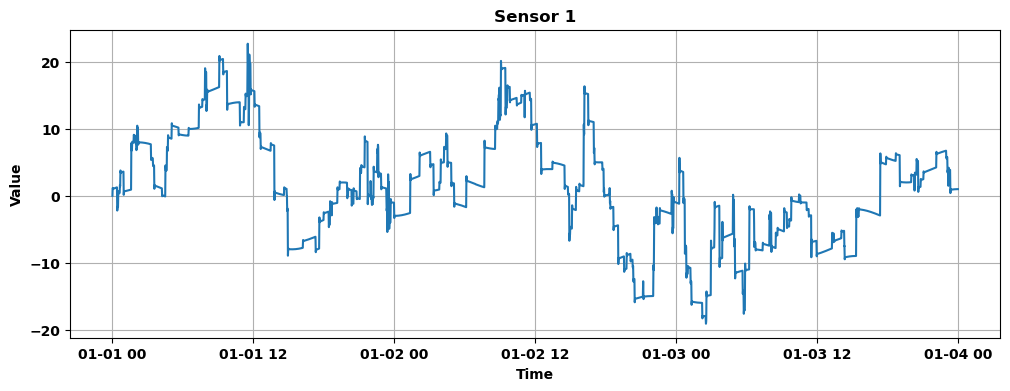

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(data['sen1'])
plt.title('Sensor 1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

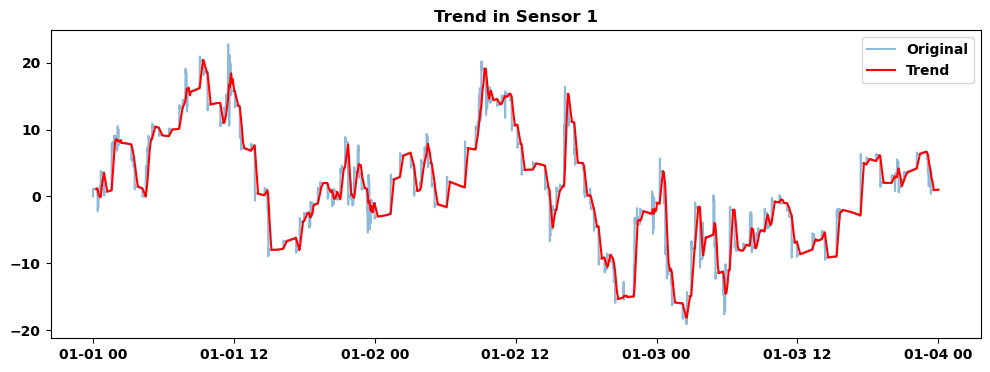

In [34]:
data['sen1_trend'] = data['sen1'].rolling(window=1000).mean()

plt.figure(figsize=(12, 4))
plt.plot(data['sen1'], alpha=0.5, label='Original')
plt.plot(data['sen1_trend'], color='red', label='Trend')
plt.title('Trend in Sensor 1')
plt.legend();

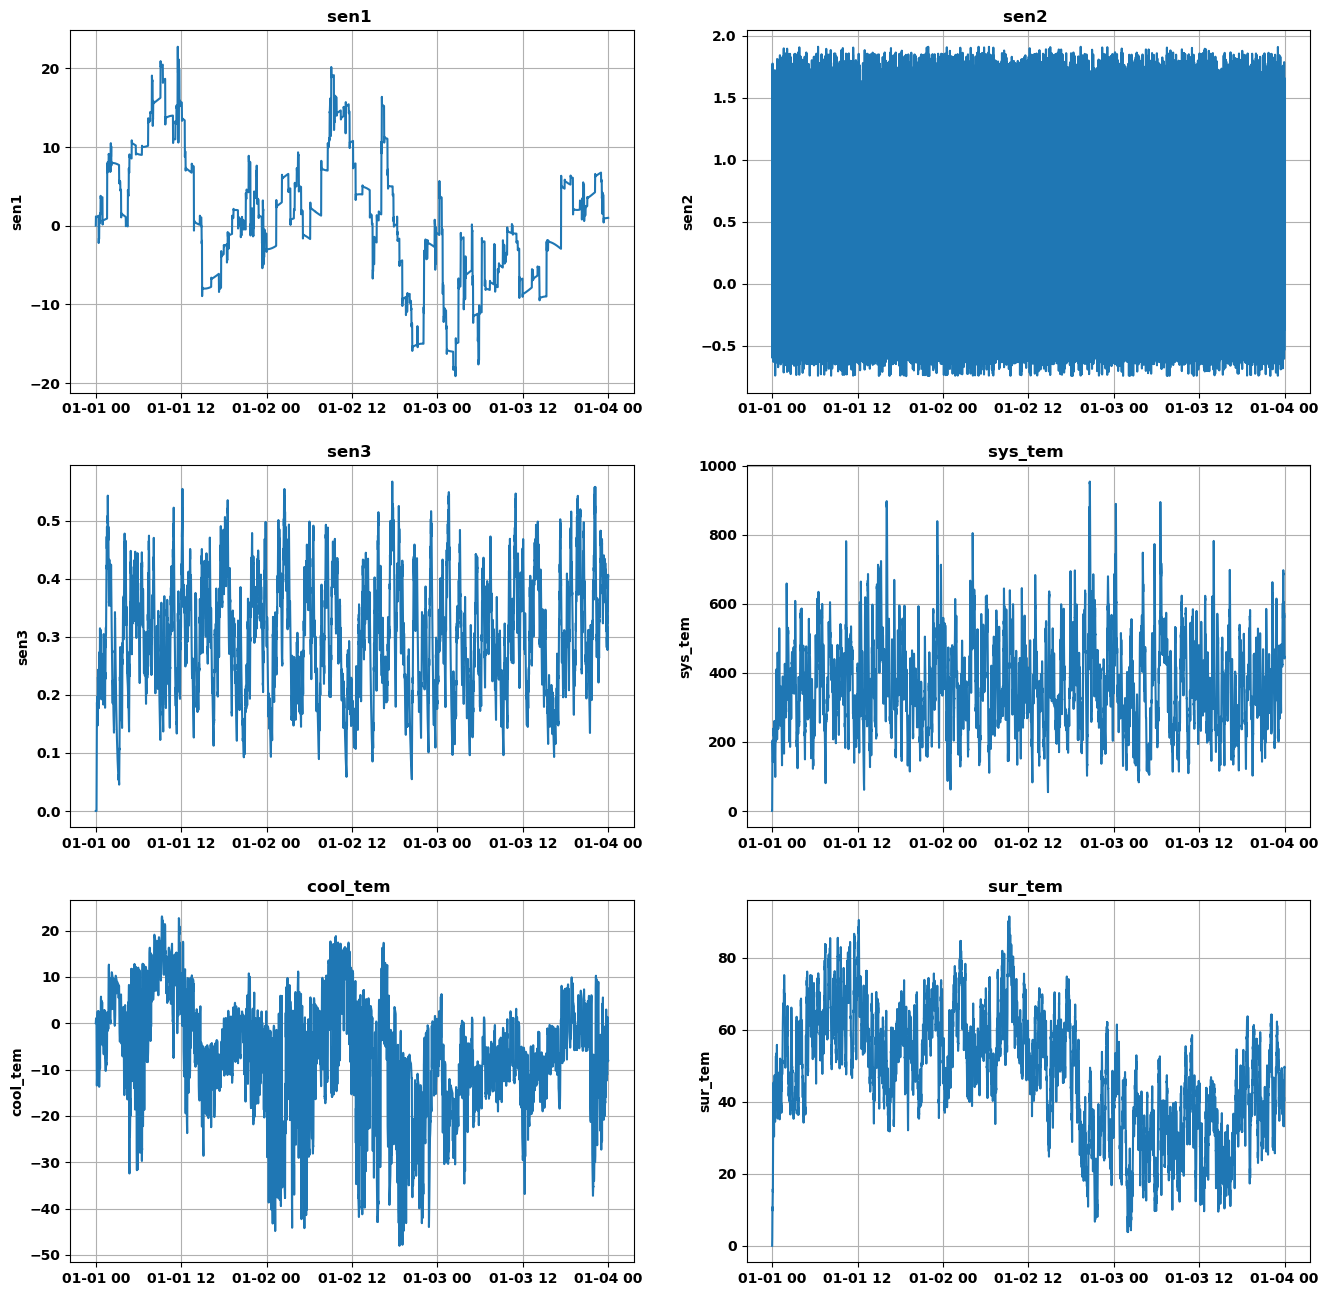

In [14]:
cols = ['sen1', 'sen2', 'sen3', 'sys_tem', 'cool_tem', 'sur_tem']

plt.figure(figsize=(16, 16))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    plt.plot(data[col])
    plt.title(f'{col} ')
    plt.xlabel('')
    plt.ylabel(col)
    plt.grid(True)

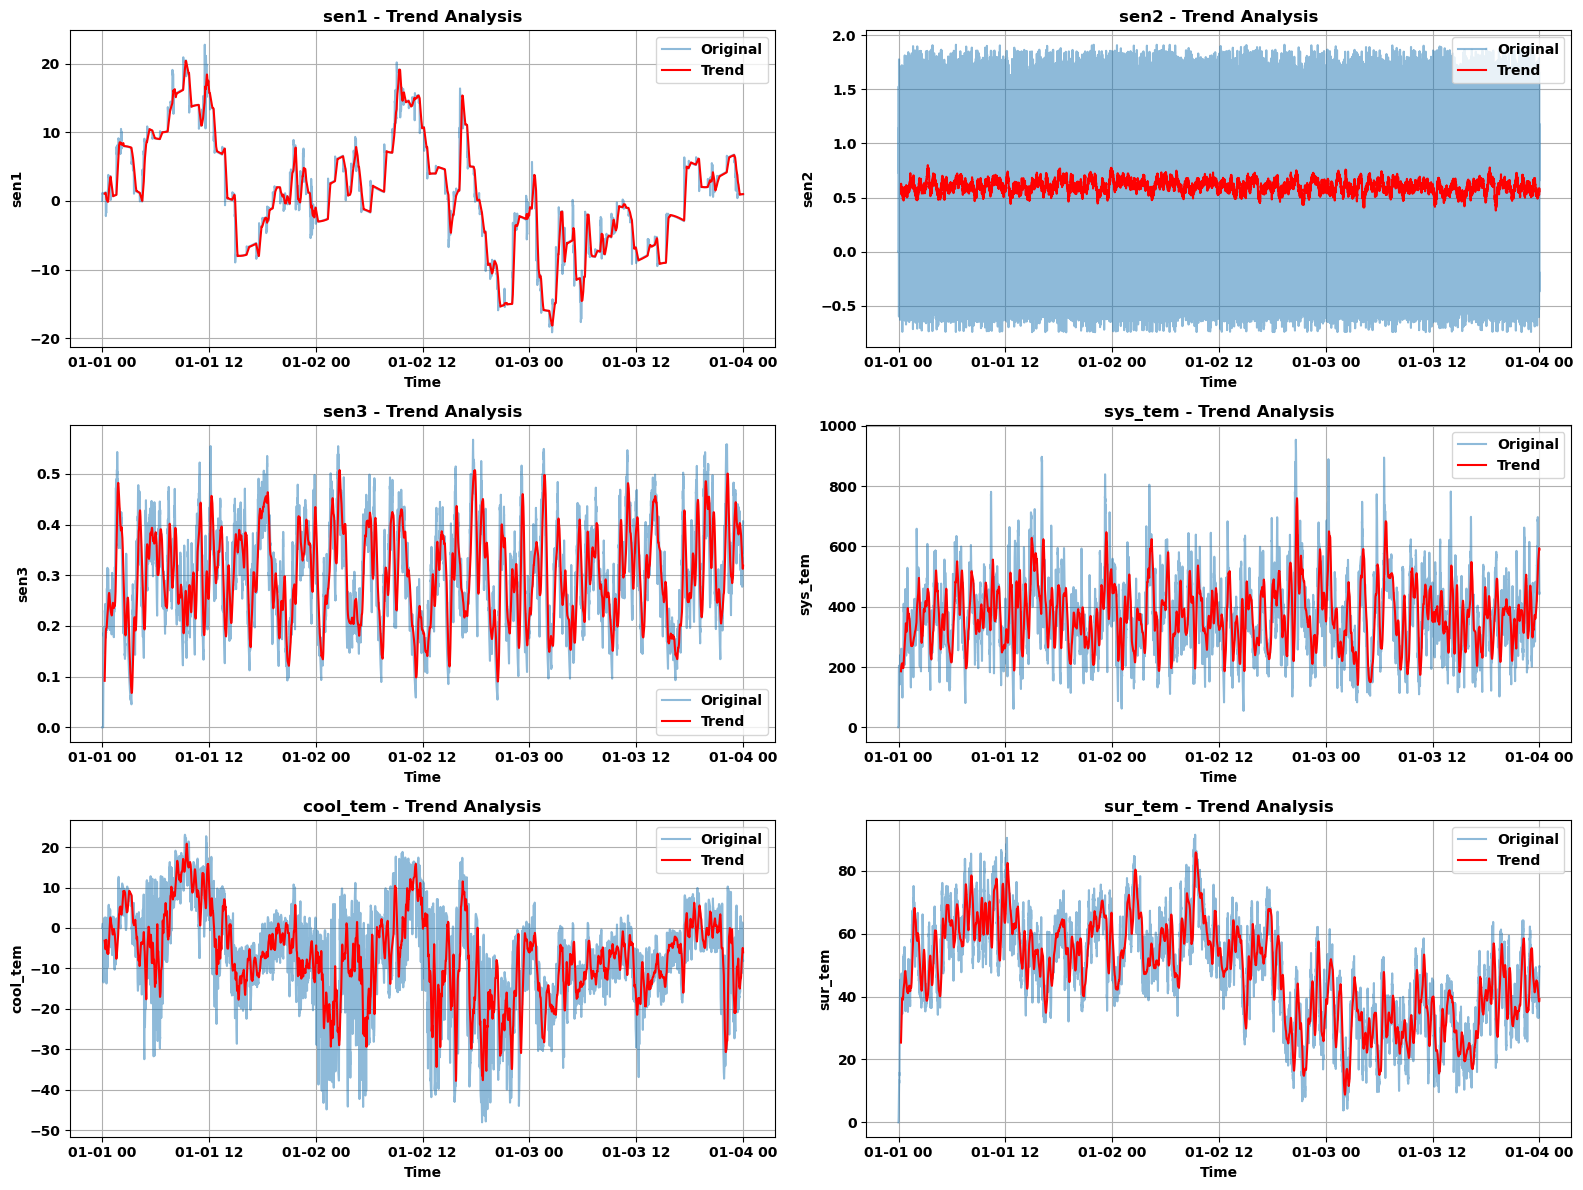

In [13]:
cols = ['sen1', 'sen2', 'sen3', 'sys_tem', 'cool_tem', 'sur_tem']
plt.figure(figsize=(16, 12))
for i, col in enumerate(cols):
    trend = data[col].rolling(window=1000).mean()
    
    plt.subplot(3, 2, i + 1)
    plt.plot(data[col], label='Original', alpha=0.5)
    plt.plot(trend, label='Trend', color='red')
    plt.title(f'{col} - Trend Analysis')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


--------------------------------------------
Clear trend: `sen1` , `sen3`, `cool_tem` , `sur_tem`

Unclear trend: `sen2` , `sys_tem` 

-----------------------------------------------

### **Seasonality**: Detect short-term repeating cycles

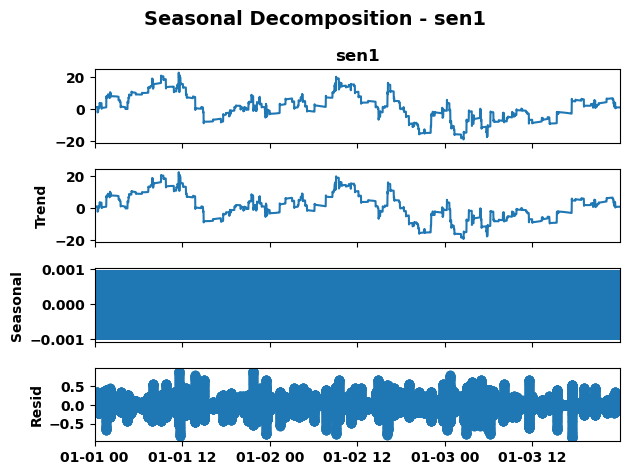

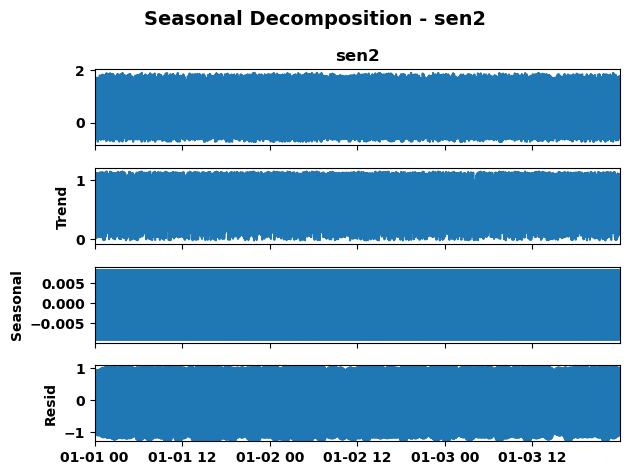

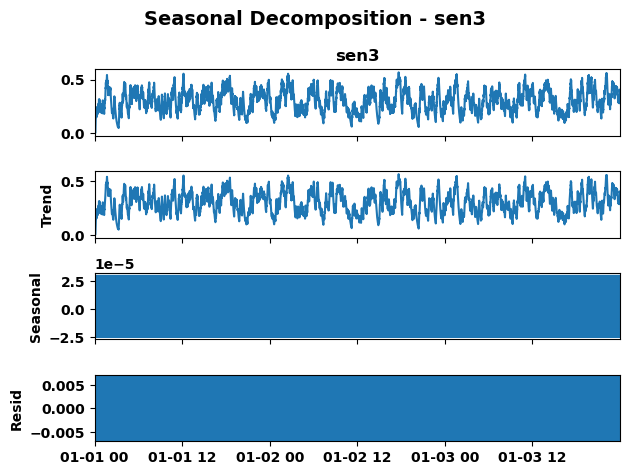

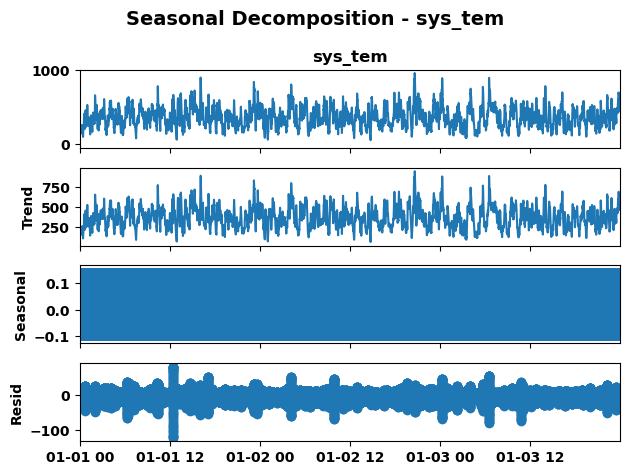

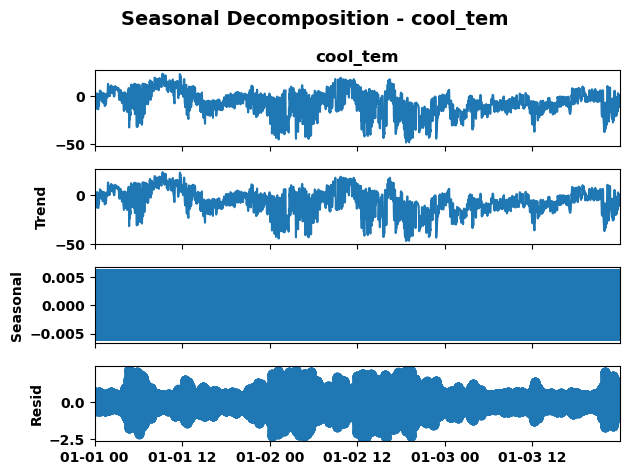

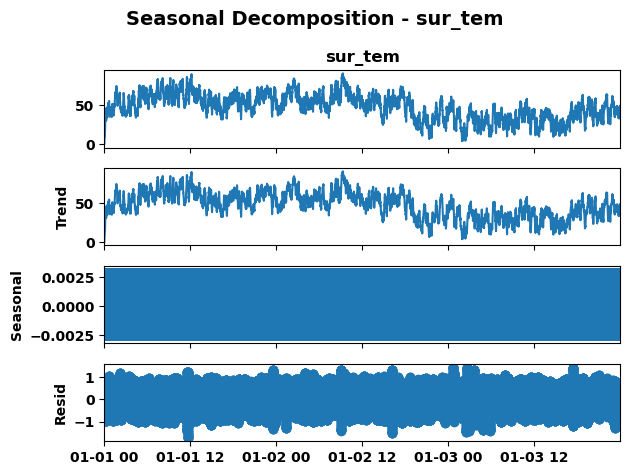

In [24]:
# seasonal_decompose
# from statsmodels.tsa.seasonal import seasonal_decompose
cols = ['sen1', 'sen2', 'sen3', 'sys_tem', 'cool_tem', 'sur_tem']
for col in cols:
    result = seasonal_decompose(data[col], model='additive', period=60)  # The period is the number of repeating steps corresponding to one complete cycle
    result.plot()
    plt.suptitle(f'Seasonal Decomposition - {col}', fontsize=14)
    plt.tight_layout()
    plt.show()

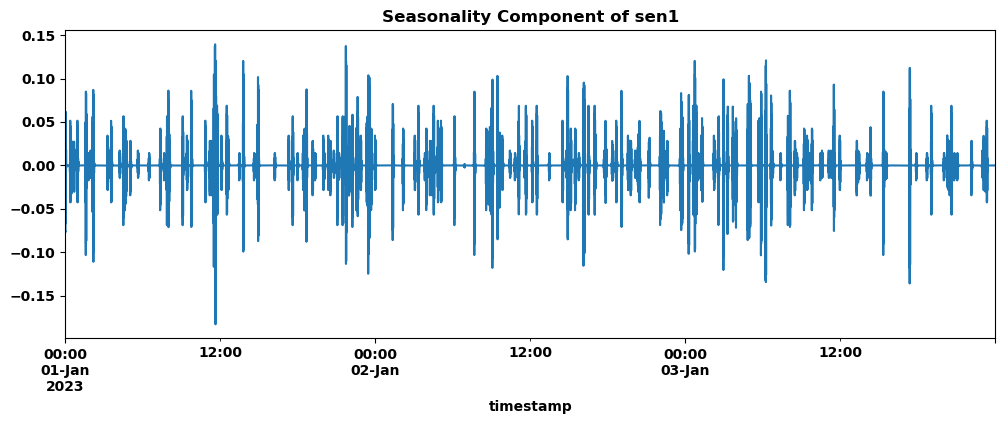

In [28]:
# STL for sensor 1
# from statsmodels.tsa.seasonal import STL

plt.figure(figsize=(12, 4))
# STL decomposition (chỉ lấy seasonality)
stl = STL(data['sen1'], period=60)
res = stl.fit()
res.seasonal.plot(title='Seasonality Component of sen1')
plt.show()

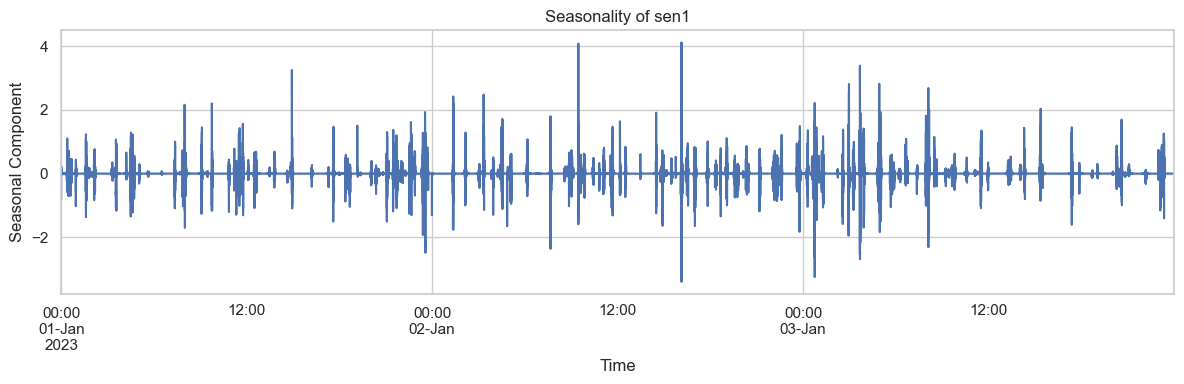

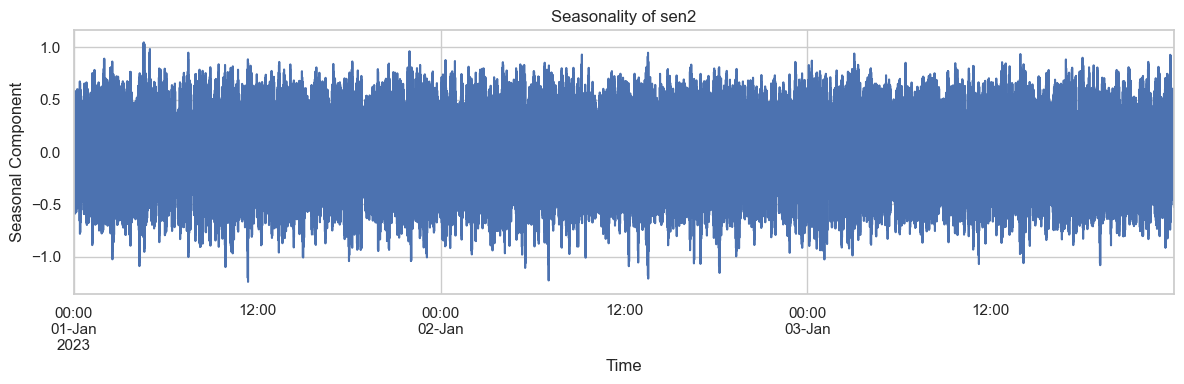

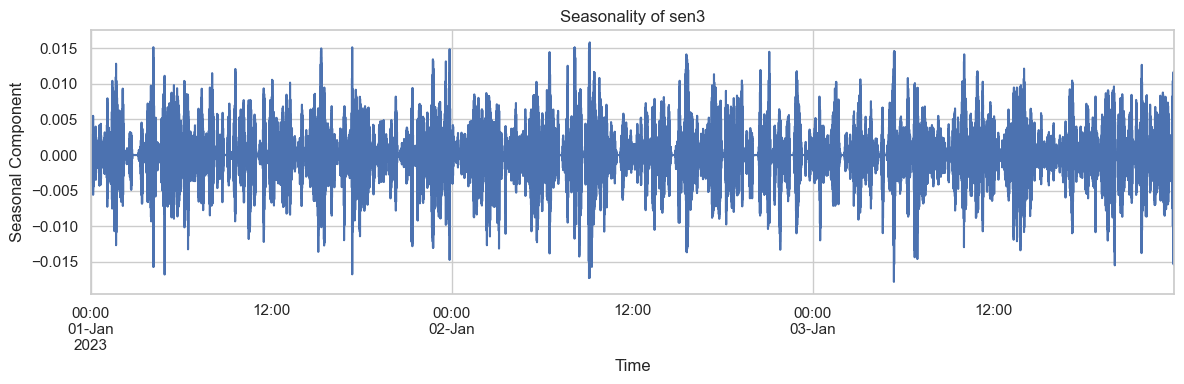

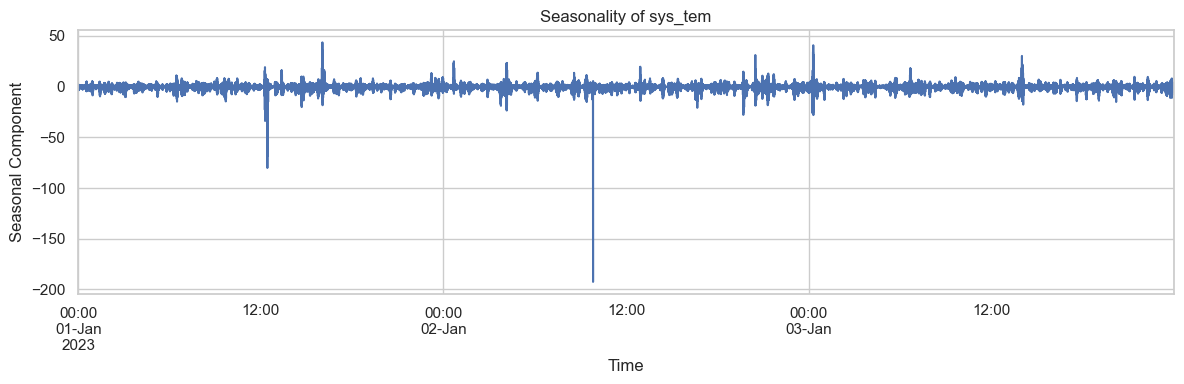

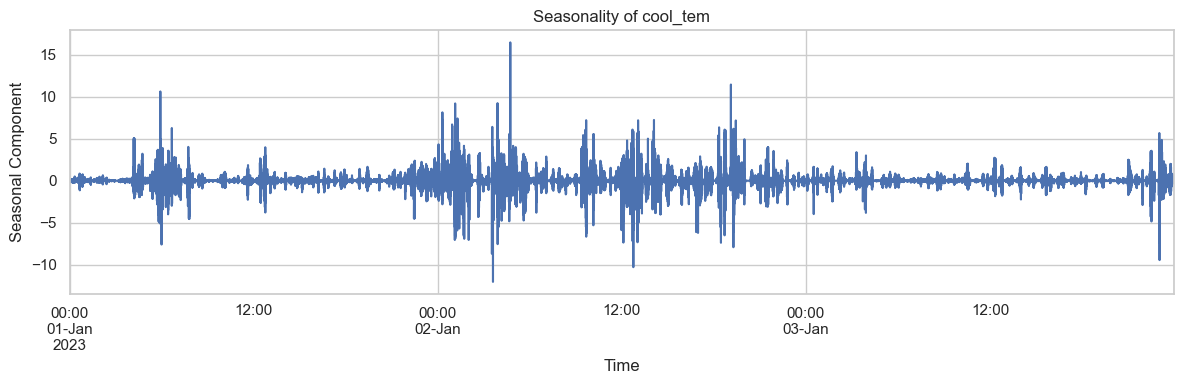

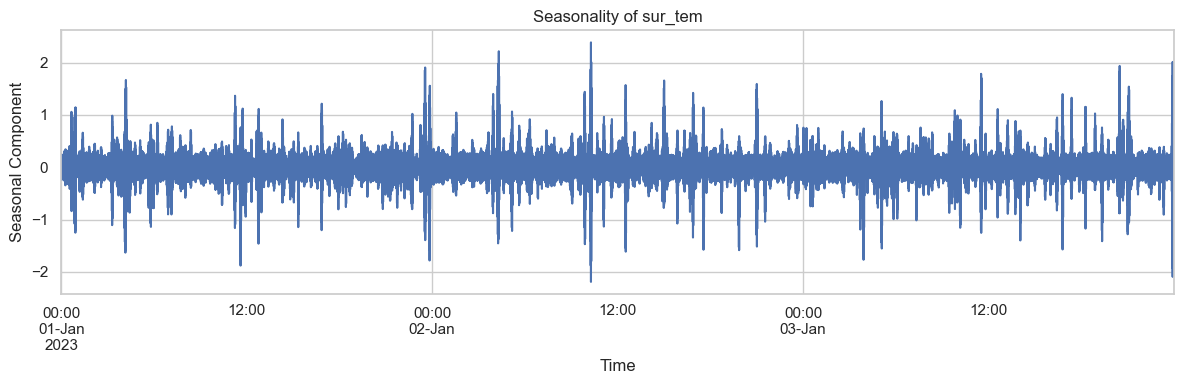

In [44]:
# from statsmodels.tsa.seasonal import STL

cols = ['sen1', 'sen2', 'sen3', 'sys_tem', 'cool_tem', 'sur_tem']
period = 60
for col in cols:
    stl = STL(data[col], period=period, robust=True)
    result = stl.fit()

    plt.figure(figsize=(12, 4))
    result.seasonal.plot()
    plt.title(f'Seasonality of {col}')
    plt.xlabel('Time')
    plt.ylabel('Seasonal Component')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

--------------------------------------------
Clear seasonality: `sen1` , `sen3`, `cool_tem` , `sur_tem`

Unclear seasonality : `sen2` , `sys_tem` 

-----------------------------------------------

## **Stationarity test**

Augmented Dickey-Fuller (ADF) test: A statistical test to determine if time-series data is stationary
- Stationarity: Statistical properties (like mean, variance and autocorrelation) structure do not change over time
- Non-Stationary: Mean, variance, or covariance changes with respect to time

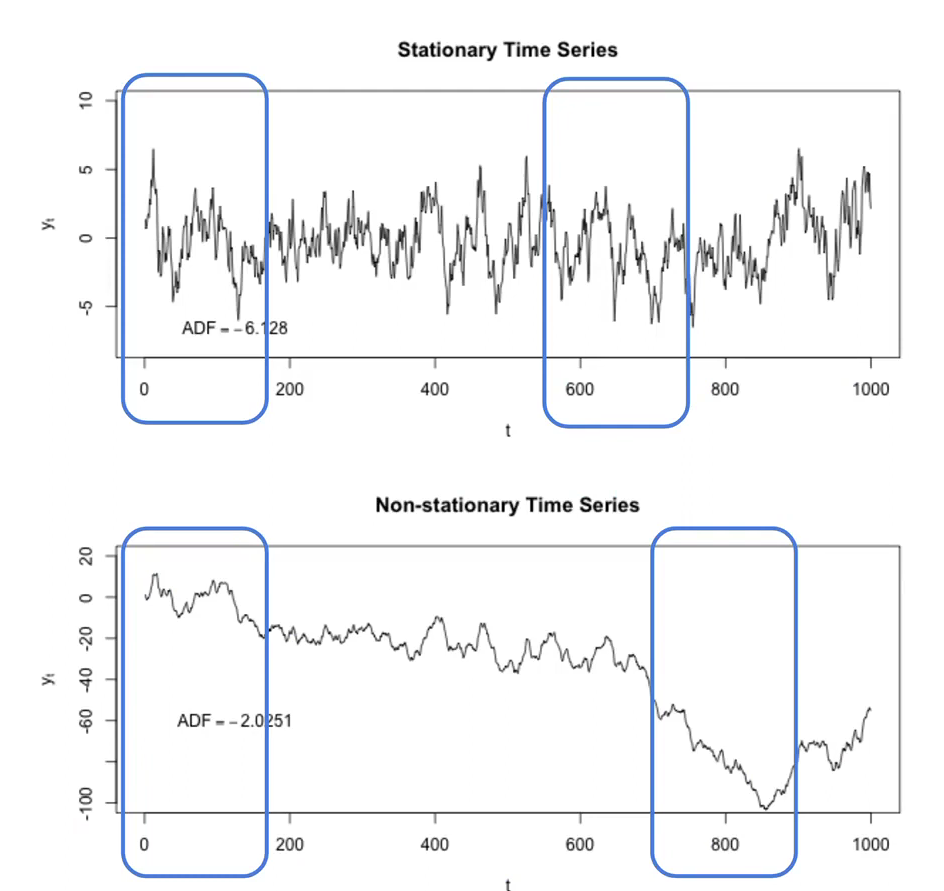

In [ ]:
# from statsmodels.tsa.stattools import adfuller
result = adfuller(data["feature1"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

In [10]:
cols = ['sen1', 'sen2', 'sen3', 'sys_tem', 'cool_tem', 'sur_tem']

for col in cols:
    result = adfuller(data[col])
    print(f"ADF test for {col}:")
    print(f"  Test Statistic: {result[0]:.4f}")
    print(f"  p-value:        {result[1]:.4f}")
    print(f"  Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.4f}")
    print("-" * 40)

ADF test for sen1:
  Test Statistic: -3.0092
  p-value:        0.0340
  Critical Values:
    1%: -3.4304
    5%: -2.8616
    10%: -2.5668
----------------------------------------
ADF test for sen2:
  Test Statistic: -53.3586
  p-value:        0.0000
  Critical Values:
    1%: -3.4304
    5%: -2.8616
    10%: -2.5668
----------------------------------------
ADF test for sen3:
  Test Statistic: -9.8737
  p-value:        0.0000
  Critical Values:
    1%: -3.4304
    5%: -2.8616
    10%: -2.5668
----------------------------------------
ADF test for sys_tem:
  Test Statistic: -15.9053
  p-value:        0.0000
  Critical Values:
    1%: -3.4304
    5%: -2.8616
    10%: -2.5668
----------------------------------------
ADF test for cool_tem:
  Test Statistic: -16.4889
  p-value:        0.0000
  Critical Values:
    1%: -3.4304
    5%: -2.8616
    10%: -2.5668
----------------------------------------
ADF test for sur_tem:
  Test Statistic: -9.2821
  p-value:        0.0000
  Critical Values:
   

*******************************************
- p - value < 0.05 -> stationary
- p - value >= 0.05 -> non-stationary (needs to be transformed)

-> **All six variables are stationary**

****************************************

## **Autocorrelation analysis**

- **Autocorrelation Function (ACF)**: The similarity between observations as a function of the time lag between them.

  -> Help *identify the degree of correlation* between the values over time, allowing for the detection of cycles or linear dependencies.
- **Partial Autocorrelation Function (PACF)**: The correlation betweeen a data point and its lagged values without the indirect effects.

  -> Help *identify the direct dependency* between values at specific lags, without being affected by prior values.

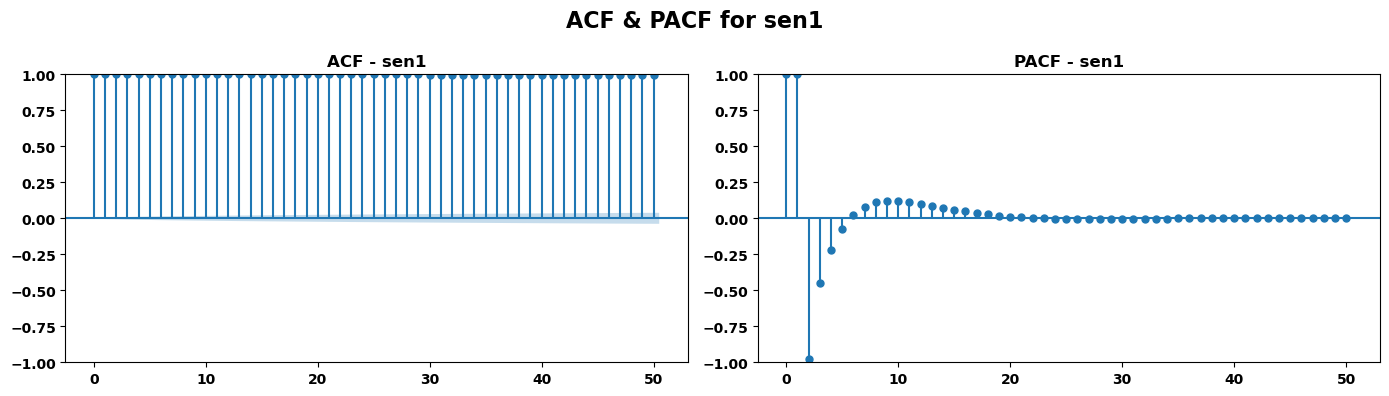

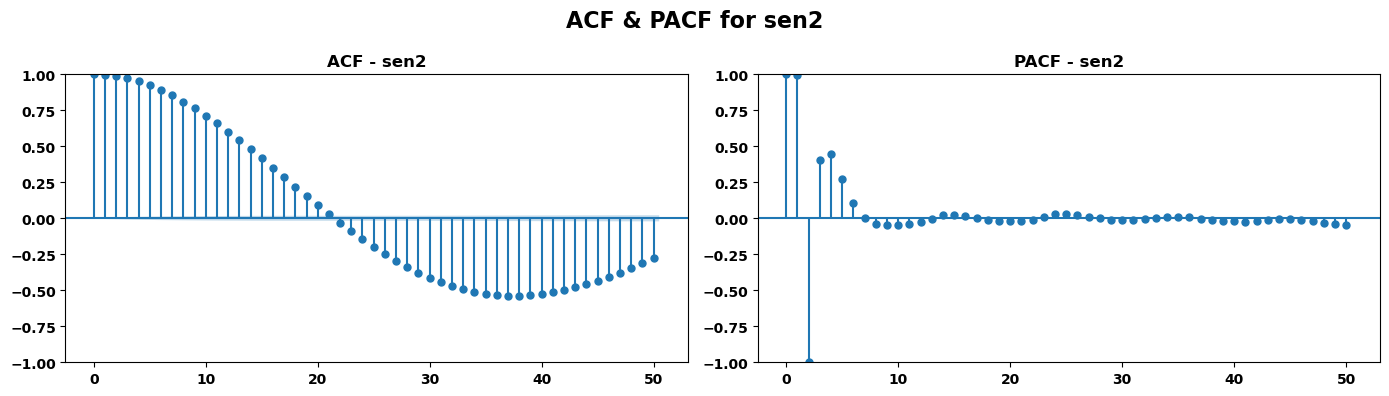

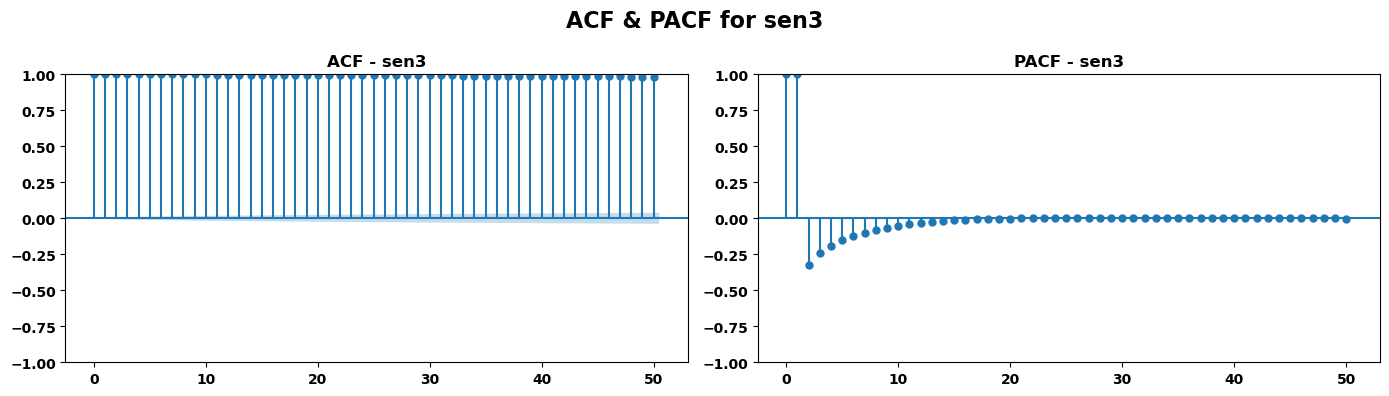

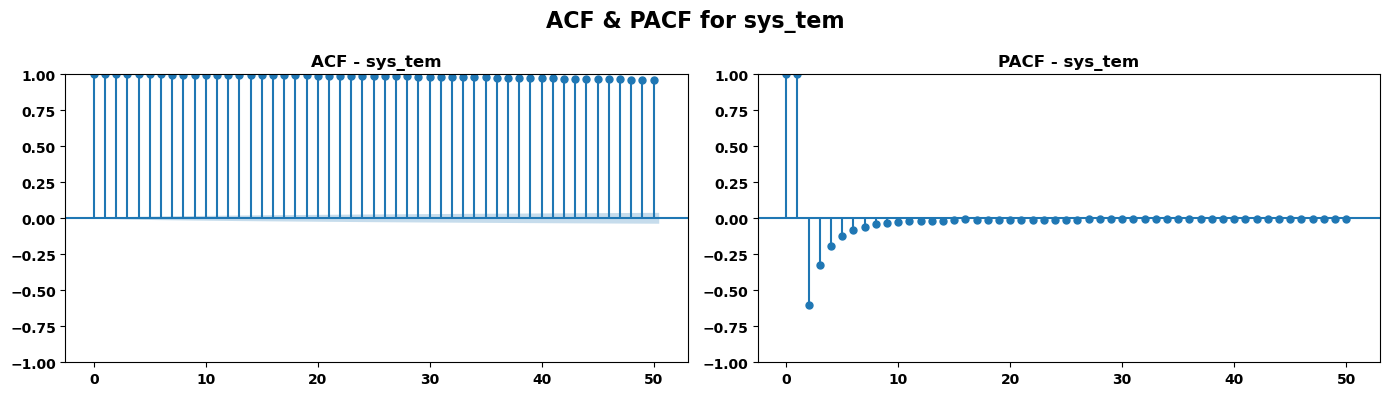

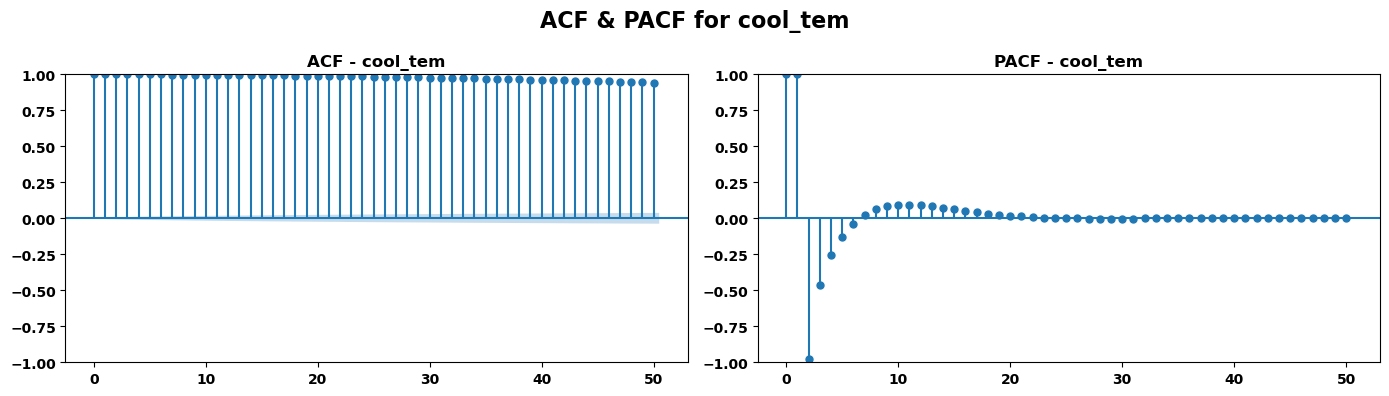

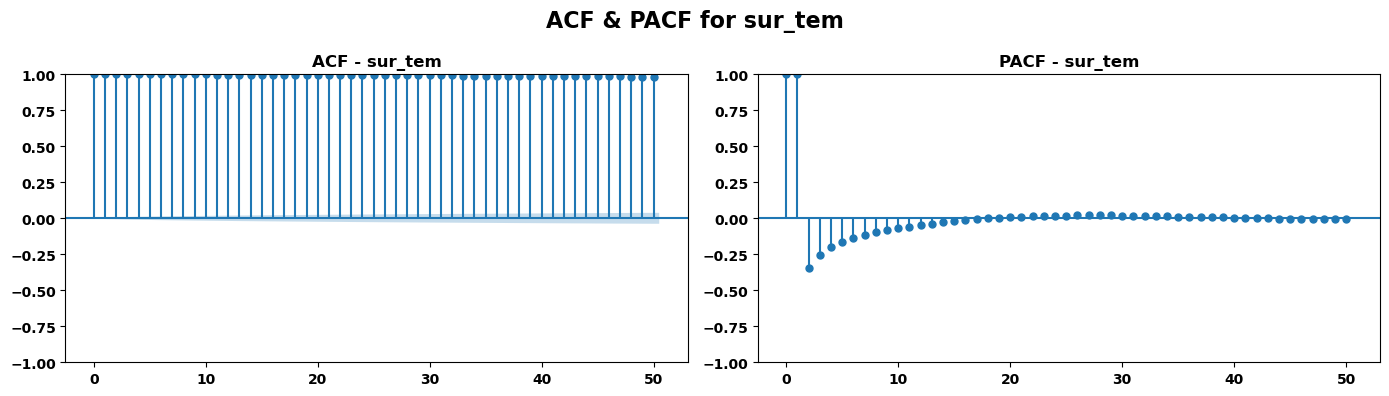

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cols = ['sen1', 'sen2', 'sen3', 'sys_tem', 'cool_tem', 'sur_tem']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle(f'ACF & PACF for {col}', fontsize=16)

    #  ACF
    plot_acf(data[col].dropna(), ax=axes[0], lags=50)
    axes[0].set_title(f'ACF - {col}')

    #  PACF
    plot_pacf(data[col].dropna(), ax=axes[1], lags=50, method='ywm')
    axes[1].set_title(f'PACF - {col}')

    plt.tight_layout()
    plt.show()